## Part 1 - NBA Player Comparision

In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week3\\NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


In [3]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


In [4]:
# Comparing players

# We use a pivot table here to list players by shots

playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
...,...,...,...,...,...
111,Demetrius Jackson,4,2,SCORED,3
203,Jarrett Jack,3,2,SCORED,2
38,Ben Bentil,3,1,MISSED,3
202,Jarnell Stokes,1,1,SCORED,1


## Westbrook - Durant Comparision

In [12]:
# Westbrook subset

Westbrook = shot[shot['shoot_player']=='Russell Westbrook']
Westbrook



,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
140311,NaN,PG,No,853.0,NaN,PHI,Jump Shot,2,OKL,76.0,0:17,10/26/2016,Russell Westbrook,NaN,1,MISSED,853.0,76.0
140314,MISSED,PG,No,802.0,SCORED,PHI,Pullup Jump Shot,2,OKL,367.0,1:51,10/26/2016,Russell Westbrook,50.0,1,SCORED,802.0,367.0
140319,BLOCKED,PG,No,853.0,SCORED,PHI,Jump Shot,2,OKL,308.0,3:59,10/26/2016,Russell Westbrook,27.0,1,BLOCKED,853.0,308.0
140321,SCORED,PG,No,809.0,SCORED,PHI,Pullup Jump Shot,2,OKL,433.0,4:54,10/26/2016,Russell Westbrook,34.0,1,MISSED,809.0,433.0
140322,MISSED,PG,No,895.0,SCORED,PHI,Driving Finger Roll Layup,2,OKL,270.0,5:44,10/26/2016,Russell Westbrook,50.0,1,SCORED,895.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147393,MISSED,PG,Yes,118.0,SCORED,OKL,Pullup Jump Shot,3,DEN,25.0,7:55,4/12/2017,Russell Westbrook,37.0,1,SCORED,815.0,475.0
147394,SCORED,PG,Yes,241.0,MISSED,OKL,Jump Shot,3,DEN,69.0,8:28,4/12/2017,Russell Westbrook,33.0,1,MISSED,692.0,431.0
147420,BLOCKED,PG,Yes,126.0,MISSED,OKL,Turnaround Jump Shot,2,DEN,367.0,8:51,4/12/2017,Russell Westbrook,47.0,2,SCORED,807.0,133.0
147425,MISSED,PG,Yes,298.0,SCORED,OKL,Jump Shot,3,DEN,370.0,11:09,4/12/2017,Russell Westbrook,35.0,2,MISSED,635.0,130.0


In [13]:
# Durant subset

Durant = shot[shot['shoot_player']=='Kevin Durant']
Durant

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
63211,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,10/25/2016,Kevin Durant,26.0,1,SCORED,736.0,256.0
63217,MISSED,SF,Yes,98.0,MISSED,GSW,Step Back Jump Shot,2,SAS,87.0,5:01,10/25/2016,Kevin Durant,27.0,1,SCORED,835.0,413.0
63218,SCORED,SF,Yes,92.0,MISSED,GSW,Turnaround Fadeaway,2,SAS,413.0,5:34,10/25/2016,Kevin Durant,33.0,1,SCORED,841.0,87.0
63219,SCORED,SF,Yes,244.0,MISSED,GSW,Pullup Jump Shot,3,SAS,423.0,5:59,10/25/2016,Kevin Durant,25.0,1,SCORED,689.0,77.0
63227,SCORED,SF,Yes,103.0,SCORED,GSW,Pullup Jump Shot,2,SAS,125.0,11:07,10/25/2016,Kevin Durant,35.0,1,MISSED,830.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,SCORED,SF,Yes,148.0,SCORED,GSW,Turnaround Jump Shot,2,LAL,295.0,11:17,4/12/2017,Kevin Durant,22.0,2,SCORED,785.0,205.0
70312,MISSED,SF,Yes,890.0,MISSED,GSW,Jump Shot,3,LAL,15.0,2:53,4/12/2017,Kevin Durant,28.0,3,MISSED,890.0,15.0
70314,SCORED,SF,Yes,666.0,SCORED,GSW,Jump Shot,3,LAL,395.0,4:18,4/12/2017,Kevin Durant,32.0,3,SCORED,666.0,395.0
70323,MISSED,SF,Yes,878.0,MISSED,GSW,Layup,2,LAL,238.0,9:59,4/12/2017,Kevin Durant,50.0,3,MISSED,878.0,238.0


(0.0, 500.0)

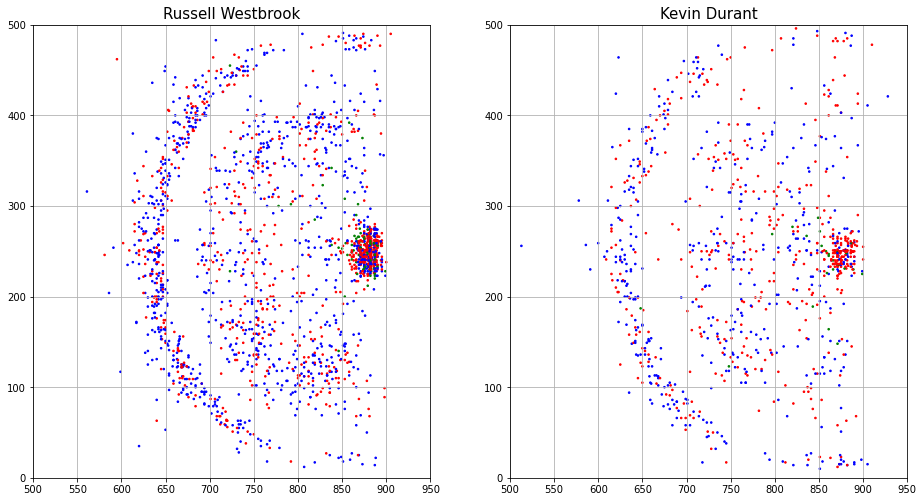

In [7]:
# Westbrook and Durant side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
hxW = Westbrook['halfcourt_x']
hyW = Westbrook['halfcourt_y']
ax = plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)
ax = f.add_subplot(122)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
hxD = Durant['halfcourt_x']
hyD = Durant['halfcourt_y']
ax = plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)

## Jordan - Howard Comparision

In [14]:
# Jordan subset

Jordan = shot[shot['shoot_player']=='DeAndre Jordan']
Jordan



,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
84433,MISSED,C,No,895.0,MISSED,POR,Layup,2,LAC,267.0,3:33,10/27/2016,DeAndre Jordan,2.0,1,BLOCKED,895.0,267.0
84435,MISSED,C,No,888.0,BLOCKED,POR,Putback Dunk,2,LAC,250.0,4:08,10/27/2016,DeAndre Jordan,0.0,1,SCORED,888.0,250.0
84466,MISSED,C,No,878.0,SCORED,POR,Reverse Layup,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,17.0,2,MISSED,878.0,272.0
84467,MISSED,C,No,887.0,SCORED,POR,Tip Layup Shot,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,0.0,2,MISSED,887.0,272.0
84477,MISSED,C,No,51.0,SCORED,POR,Tip Layup Shot,2,LAC,249.0,2:23,10/27/2016,DeAndre Jordan,1.0,3,MISSED,882.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91202,MISSED,C,Yes,53.0,SCORED,LAC,Tip Layup Shot,2,SAC,262.0,9:03,4/12/2017,DeAndre Jordan,5.0,2,SCORED,880.0,238.0
91213,SCORED,C,Yes,888.0,SCORED,LAC,Cutting Dunk Shot,2,SAC,250.0,3:14,4/12/2017,DeAndre Jordan,41.0,3,SCORED,888.0,250.0
91215,SCORED,C,Yes,888.0,SCORED,LAC,Dunk,2,SAC,250.0,4:24,4/12/2017,DeAndre Jordan,28.0,3,SCORED,888.0,250.0
91228,MISSED,C,Yes,888.0,MISSED,LAC,Alley Oop Dunk,2,SAC,250.0,1:28,4/12/2017,DeAndre Jordan,38.0,4,SCORED,888.0,250.0


In [15]:
# Howard subset

Howard = shot[shot['shoot_player']=='Dwight Howard']
Howard

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
15,MISSED,C,Yes,62.0,MISSED,ATL,Jump Shot,2,WAS,329.0,7:36,10/27/2016,Dwight Howard,3.0,1,SCORED,871.0,171.0
17,MISSED,C,Yes,82.0,MISSED,ATL,Jump Bank Shot,2,WAS,373.0,8:22,10/27/2016,Dwight Howard,22.0,1,MISSED,851.0,127.0
39,MISSED,C,Yes,112.0,MISSED,ATL,Hook Shot,2,WAS,278.0,8:37,10/27/2016,Dwight Howard,125.0,2,SCORED,821.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,MISSED,C,Yes,52.0,SCORED,ATL,Dunk,2,CHA,250.0,11:16,4/11/2017,Dwight Howard,115.0,2,MISSED,881.0,250.0
6805,MISSED,C,Yes,890.0,MISSED,ATL,Tip Layup Shot,2,CHA,240.0,2:33,4/11/2017,Dwight Howard,4.0,3,MISSED,890.0,240.0
6806,MISSED,C,Yes,887.0,MISSED,ATL,Tip Layup Shot,2,CHA,256.0,2:34,4/11/2017,Dwight Howard,1.0,3,SCORED,887.0,256.0
6807,SCORED,C,Yes,888.0,SCORED,ATL,Alley Oop Dunk,2,CHA,250.0,3:25,4/11/2017,Dwight Howard,51.0,3,SCORED,888.0,250.0


(0.0, 500.0)

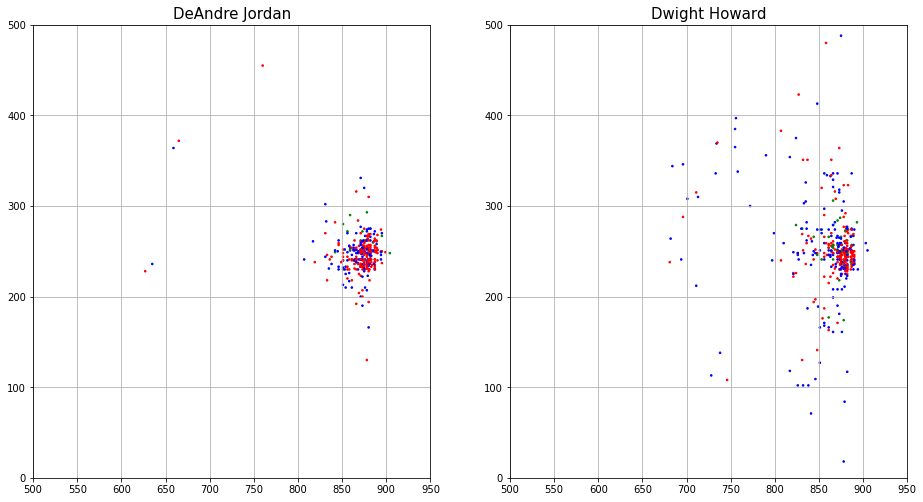

In [8]:
# Westbrook and Durant side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
hxJ = Jordan['halfcourt_x']
hyJ = Jordan['halfcourt_y']
ax = plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("DeAndre Jordan", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)
ax = f.add_subplot(122)
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
hxH = Howard['halfcourt_x']
hyH = Howard['halfcourt_y']
ax = plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Dwight Howard", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)

## Lopez - Lopez Comparision

In [16]:
# Brook Lopez subset

B_Lopez = shot[shot['shoot_player']=='Brook Lopez']
B_Lopez


,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
13896,NaN,C,No,878.0,NaN,BOS,Driving Hook Shot,2,BRO,151.0,0:14,10/26/2016,Brook Lopez,NaN,1,MISSED,878.0,151.0
13900,SCORED,C,No,828.0,MISSED,BOS,Jump Shot,2,BRO,288.0,2:24,10/26/2016,Brook Lopez,34.0,1,BLOCKED,828.0,288.0
13904,MISSED,C,No,890.0,MISSED,BOS,Tip Layup Shot,2,BRO,250.0,3:57,10/26/2016,Brook Lopez,1.0,1,MISSED,890.0,250.0
13907,SCORED,C,No,882.0,SCORED,BOS,Layup,2,BRO,241.0,5:37,10/26/2016,Brook Lopez,25.0,1,MISSED,882.0,241.0
13920,MISSED,C,No,647.0,SCORED,BOS,Jump Shot,3,BRO,199.0,1:41,10/26/2016,Brook Lopez,38.0,2,SCORED,647.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20787,MISSED,C,No,77.0,MISSED,BOS,Jump Shot,2,BRO,179.0,6:40,4/10/2017,Brook Lopez,12.0,4,MISSED,856.0,321.0
20790,MISSED,C,No,97.0,SCORED,BOS,Turnaround Hook Shot,2,BRO,303.0,7:28,4/10/2017,Brook Lopez,24.0,4,SCORED,836.0,197.0
20791,SCORED,C,No,77.0,SCORED,BOS,Turnaround Fadeaway,2,BRO,177.0,7:59,4/10/2017,Brook Lopez,31.0,4,SCORED,856.0,323.0
20792,SCORED,C,No,305.0,SCORED,BOS,Jump Shot,3,BRO,230.0,8:32,4/10/2017,Brook Lopez,33.0,4,MISSED,628.0,270.0


In [17]:
# Robin Lopez subset

R_Lopez = shot[shot['shoot_player']=='Robin Lopez']
R_Lopez

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
27886,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,10/27/2016,Robin Lopez,12.0,1,MISSED,831.0,257.0
27894,MISSED,C,Yes,67.0,SCORED,CHI,Tip Layup Shot,2,BOS,246.0,5:15,10/27/2016,Robin Lopez,1.0,1,SCORED,866.0,254.0
27896,SCORED,C,Yes,52.0,MISSED,CHI,Cutting Dunk Shot,2,BOS,250.0,6:51,10/27/2016,Robin Lopez,56.0,1,SCORED,881.0,250.0
27898,BLOCKED,C,Yes,146.0,MISSED,CHI,Jump Shot,2,BOS,401.0,7:14,10/27/2016,Robin Lopez,7.0,1,MISSED,787.0,99.0
27900,SCORED,C,Yes,72.0,SCORED,CHI,Turnaround Hook Shot,2,BOS,174.0,8:21,10/27/2016,Robin Lopez,38.0,1,MISSED,861.0,326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34907,MISSED,C,Yes,873.0,MISSED,CHI,Driving Layup,2,ORL,228.0,11:32,4/10/2017,Robin Lopez,25.0,3,SCORED,873.0,228.0
34937,MISSED,C,Yes,58.0,MISSED,CHI,Driving Hook Shot,2,BRO,301.0,6:02,4/12/2017,Robin Lopez,21.0,1,SCORED,875.0,199.0
34945,SCORED,C,Yes,215.0,MISSED,CHI,Jump Shot,2,BRO,149.0,9:18,4/12/2017,Robin Lopez,37.0,1,MISSED,718.0,351.0
34971,MISSED,C,Yes,79.0,SCORED,CHI,Hook Shot,2,BRO,254.0,11:25,4/12/2017,Robin Lopez,38.0,2,MISSED,854.0,246.0


(0.0, 500.0)

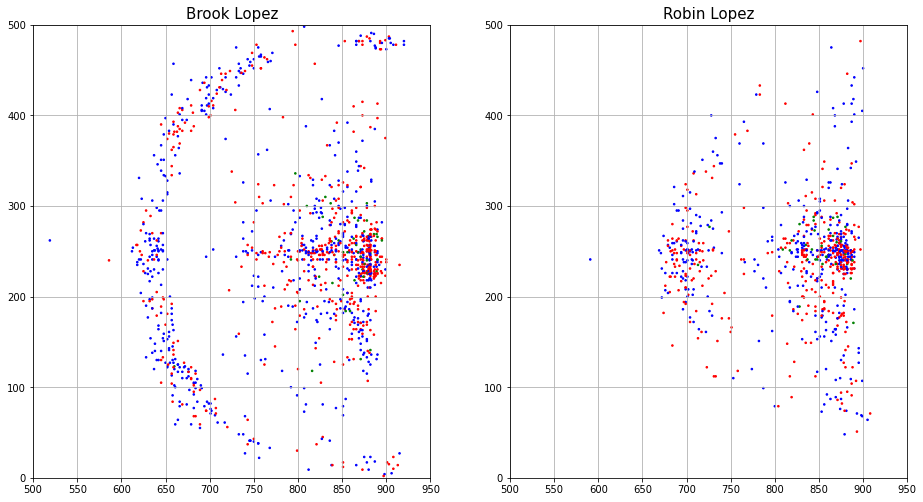

In [10]:
# Brook Lopez and Robin Lopex side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(B_Lopez['current_shot_outcome']=='SCORED','r',np.where(B_Lopez['current_shot_outcome']=='MISSED','b','g'))
hxB = B_Lopez['halfcourt_x']
hyB = B_Lopez['halfcourt_y']
ax = plt.scatter(hxB,hyB, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Brook Lopez", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)
ax = f.add_subplot(122)
colors = np.where(R_Lopez['current_shot_outcome']=='SCORED','r',np.where(R_Lopez['current_shot_outcome']=='MISSED','b','g'))
hxR = R_Lopez['halfcourt_x']
hyR = R_Lopez['halfcourt_y']
ax = plt.scatter(hxR,hyR, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Robin Lopez", fontsize = 15)
plt.xlim(500,950)
plt.ylim(0,500)